# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
elteams=pd.read_csv("datasets/actual.csv")
ecteams=pd.read_excel("datasets/ec2023.xlsx", index_col=False)

In [4]:
ecteams["Competition"] = "Eurocup"
ecteams = ecteams.drop("Ganador" , axis=1)
ecteams = ecteams.rename (columns={"Winner" : "Ganador"})
ecteams = ecteams.rename(columns=lambda x: x.capitalize())
comp_ec = ecteams[["Competition", "Localscore", "Roadscore", "Plusminus", "Ganador"]]
ecteams

,Unnamed: 0,Fecha,Ronda,Local,Visitante,Localscore,Roadscore,Ganador,Plusminus,Competition
0,0,2024-01-31T21:00:00,17,Dreamland Gran Canaria,U-BT Cluj-Napoca,111,113.0,Visitante,-2.0,Eurocup
1,1,2024-01-31T20:00:00,17,Dolomiti Energia Trento,Buducnost VOLI Podgorica,78,97.0,Visitante,-19.0,Eurocup
2,2,2024-01-31T19:30:00,17,ratiopharm Ulm,Aris Midea Thessaloniki,66,86.0,Visitante,-20.0,Eurocup
3,3,2024-01-31T18:30:00,17,Cedevita Olimpija Ljubljana,London Lions,85,92.0,Visitante,-7.0,Eurocup
4,4,2024-01-31T18:00:00,17,Turk Telekom Ankara,Mincidelice JL Bourg en Bresse,64,68.0,Visitante,-4.0,Eurocup
...,...,...,...,...,...,...,...,...,...,...
168,165,2023-10-04T18:00:00,1,U-BT Cluj-Napoca,Turk Telekom Ankara,80,71.0,Local,9.0,Eurocup
169,166,2023-10-04T18:00:00,1,Prometey Slobozhanske,Veolia Towers Hamburg,97,77.0,Local,20.0,Eurocup
170,167,2023-10-03T20:30:00,1,Paris Basketball,Wolves Vilnius,105,78.0,Local,27.0,Eurocup
171,168,2023-10-03T19:30:00,1,ratiopharm Ulm,Dolomiti Energia Trento,80,70.0,Local,10.0,Eurocup


In [7]:
comp_ec = ecteams[["Competition", "Localscore", "Roadscore", "Plusminus", "Ganador"]]
comp_el = elteams[["Competition", "Localscore", "Roadscore", "Plusminus", "Ganador"]]
competition=pd.concat([comp_el, comp_ec], axis=0, ignore_index=True)
competition["Absolut_Plusminus"] = abs(competition["Plusminus"])
competition

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
0,Euroleague,94,73.0,21.0,Local,21.0
1,Euroleague,96,81.0,15.0,Local,15.0
2,Euroleague,79,82.0,-3.0,Visitante,3.0
3,Euroleague,80,68.0,12.0,Local,12.0
4,Euroleague,91,74.0,17.0,Local,17.0
...,...,...,...,...,...,...
393,Eurocup,80,71.0,9.0,Local,9.0
394,Eurocup,97,77.0,20.0,Local,20.0
395,Eurocup,105,78.0,27.0,Local,27.0
396,Eurocup,80,70.0,10.0,Local,10.0


Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

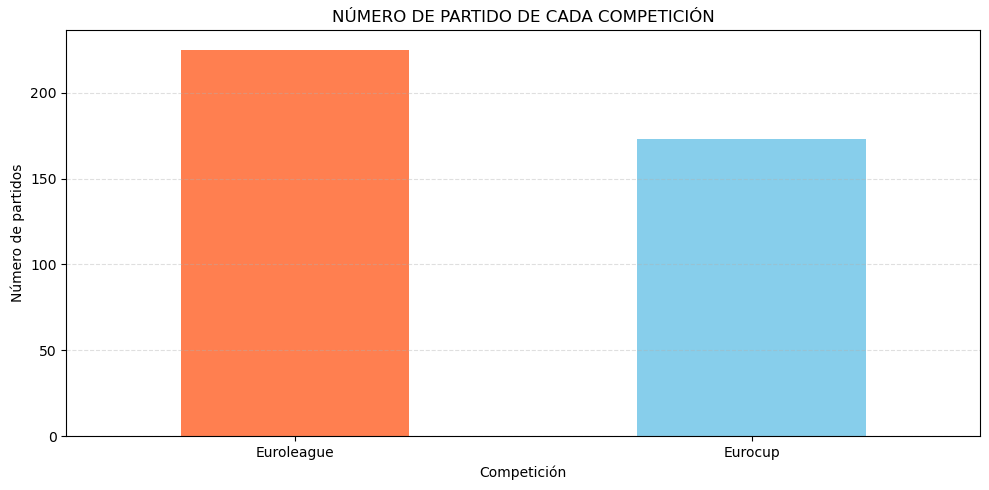

In [33]:
# 1
numero_partidos_competicion = competition["Competition"].value_counts()

plt.figure(figsize=(10,5))
numero_partidos_competicion.plot(kind="bar", rot=0,  color=['coral','skyblue'])
plt.title("NÚMERO DE PARTIDO DE CADA COMPETICIÓN")
plt.xlabel("Competición")
plt.ylabel("Número de partidos")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout();

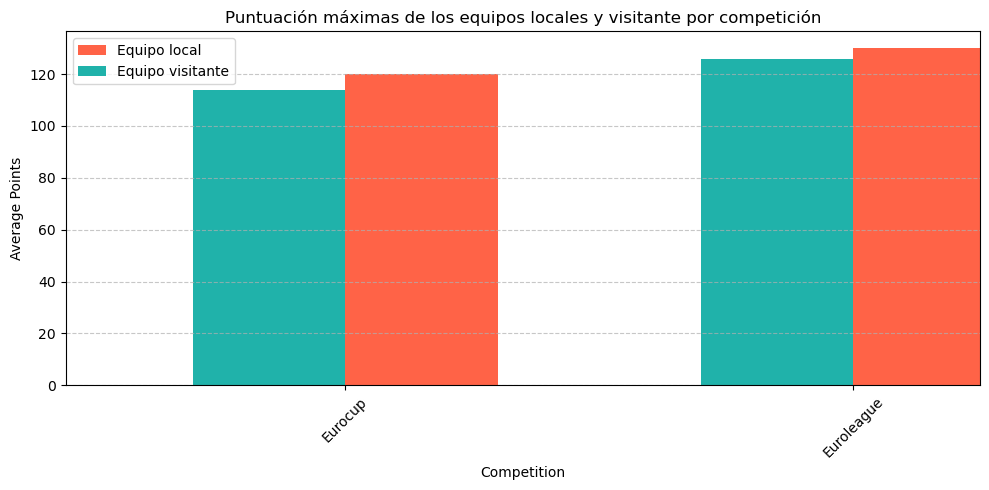

In [34]:
# 2
maxima_puntuacion_local = competition.groupby("Competition")["Localscore"].max()
maxima_puntuacion_visitante = competition.groupby("Competition")["Roadscore"].max()

plt.figure(figsize=(10, 5))
maxima_puntuacion_local.plot(kind="bar", position=0, width=0.3, label="Equipo local", rot=45, color="tomato")
maxima_puntuacion_visitante.plot(kind="bar", position=1, width=0.3, label="Equipo visitante", rot=45, color="lightseagreen")
plt.title("Puntuación máximas de los equipos locales y visitante por competición")
plt.xlabel("Competition")
plt.ylabel("Average Points")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.legend();

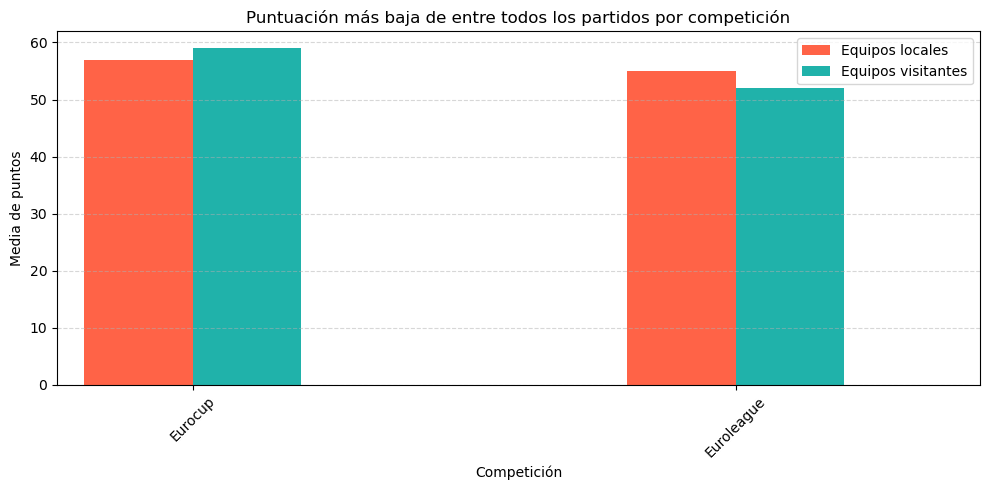

In [51]:
# 3
puntuacion_minima_local= competition.groupby("Competition")["Localscore"].min()
puntuacion_minima_visitante= competition.groupby("Competition")["Roadscore"].min()
plt.figure(figsize=(10, 5))
puntuacion_minima_local.plot(kind="bar", position=1, width=0.2, label="Equipos locales", rot=45, color="tomato")
puntuacion_minima_visitante.plot(kind="bar", position=0, width=0.2, label="Equipos visitantes", rot=45, color="lightseagreen")
plt.title("Puntuación más baja de entre todos los partidos por competición")
plt.xlabel("Competición")
plt.ylabel("Media de puntos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend();

El número de partidos por competición es: Competition
Eurocup       39.0
Euroleague    39.0
Name: Absolut_Plusminus, dtype: float64


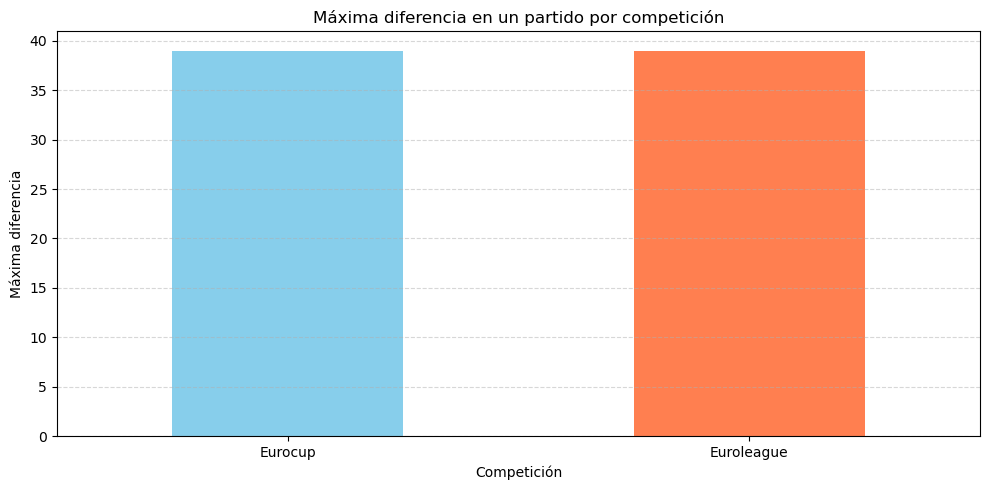

In [25]:
# 4
maxima_diferencia = competition.groupby("Competition")["Absolut_Plusminus"].max()
print("El número de partidos por competición es:" , maxima_diferencia)

plt.figure(figsize=(10, 5))
maxima_diferencia.plot(kind='bar', color=["skyblue","coral"])
plt.title("Máxima diferencia en un partido por competición")
plt.xlabel("Competición")
plt.ylabel("Máxima diferencia")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout();

El número de victorias por competición es: Competition  Ganador  
Eurocup      Local         91
             Visitante     82
Euroleague   Local        150
             Visitante     75
Name: Ganador, dtype: int64


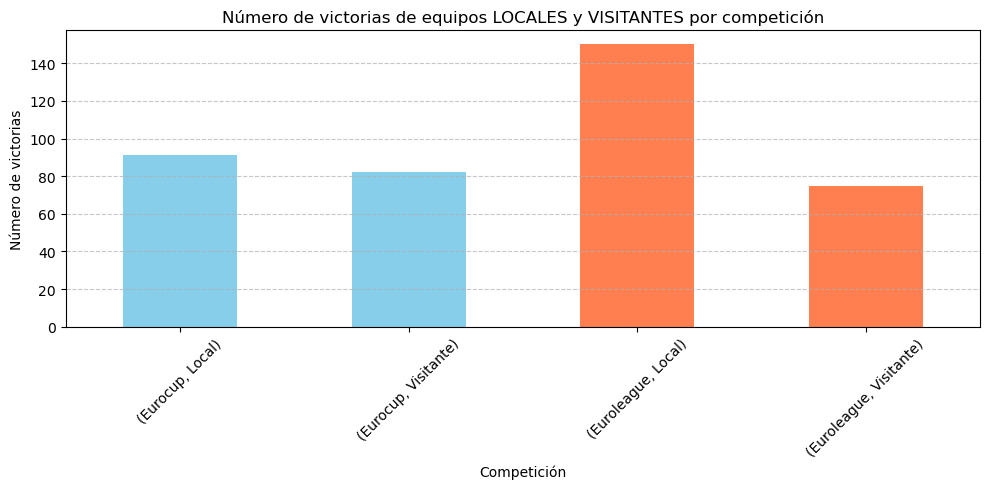

In [35]:
# 5
victorias_locales_visitantes_por_competicion = competition.groupby(["Competition","Ganador"])["Ganador"].count()
print("El número de victorias por competición es:" , victorias_locales_visitantes_por_competicion)

plt.figure(figsize=(10, 5))
victorias_locales_visitantes_por_competicion.plot(kind="bar", stacked=True, color=["skyblue", "skyblue", "coral", "coral"])
plt.title("Número de victorias de equipos LOCALES y VISITANTES por competición")
plt.xlabel("Competición")
plt.ylabel("Número de victorias")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

In [13]:
competition.head()

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
0,Euroleague,94,73.0,21.0,Local,21.0
1,Euroleague,96,81.0,15.0,Local,15.0
2,Euroleague,79,82.0,-3.0,Visitante,3.0
3,Euroleague,80,68.0,12.0,Local,12.0
4,Euroleague,91,74.0,17.0,Local,17.0


Competition
Eurocup       84.0
Euroleague    84.0
Name: Localscore, dtype: float64


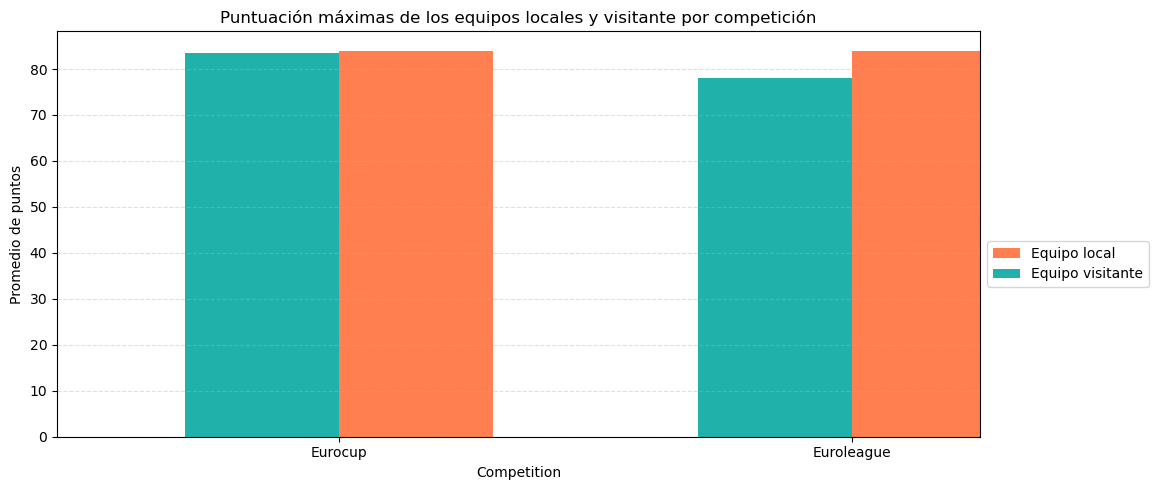

In [59]:
# Comparison Chart
media = competition.groupby("Competition")["Localscore"].mean()
media = competition.groupby("Competition")["Roadscore"].mean()

print(maxima_puntuacion_local)
plt.figure(figsize=(10, 5))
maxima_puntuacion_local.plot(kind='bar', position=0, width=0.3, label="Equipo local", rot=45, color="coral")
maxima_puntuacion_visitante.plot(kind='bar', position=1, width=0.3, label="Equipo visitante", rot=45, color="lightseagreen")
plt.title("Puntuación máximas de los equipos locales y visitante por competición")
plt.xlabel("Competition")
plt.ylabel("Promedio de puntos")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 0.5), loc="upper left");

**Your comments here**
- Podemos usar un gráfico de barras para comparar las puntuaciones mínimas de equipos locales y visitantes en las dos competiciones.
- Vemos que las puntuaciones mínimas dentro de la misma competición som muy similares. Ambas no superan los 60 puntos.
- Si miramos propiamente en cada competición, vemos que la diferncia en la Eurocup es muy pequeña, al igual que en la Euroleague.
- La diferencia entre las anotaciones mínimas del equipo visitante en las dos competiciones no llegan a los 10 puntos. En el caso de la Euroleague son más parejas.

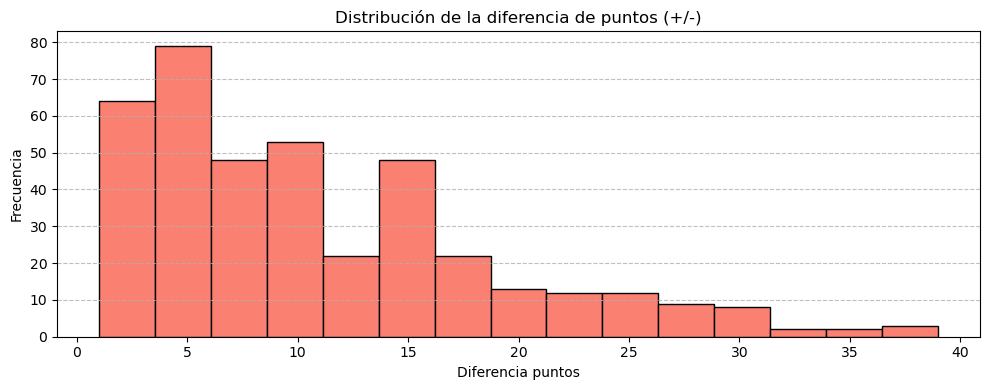

In [57]:
# Histogram
plt.figure(figsize=(10, 4))
plt.hist(competition["Absolut_Plusminus"], bins=15, color="salmon", edgecolor="black")
plt.title("Distribución de la diferencia de puntos (+/-)")
plt.xlabel("Diferencia puntos")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.8)
plt.tight_layout();

**Your comments here**
- Utilizo un histograma para visualizar la distribución de las diferencias de puntos (+/-) en los partidos de ambas competiciones.
- Este histograma nos ayuda a entender cómo se distribuyen las diferencias de puntos (+/-) en los partidos, de esta manera podemos ver si hay una mayor concentración en ciertos rangos de diferencia.
- Vemos que la gran mayoría de los partidos se resuelven entre diferencia menores a los 15 puntos y que hay muchos menos partidos que se resuelven en difrencias mayores, pocos casos superan los 25 o más puntos.

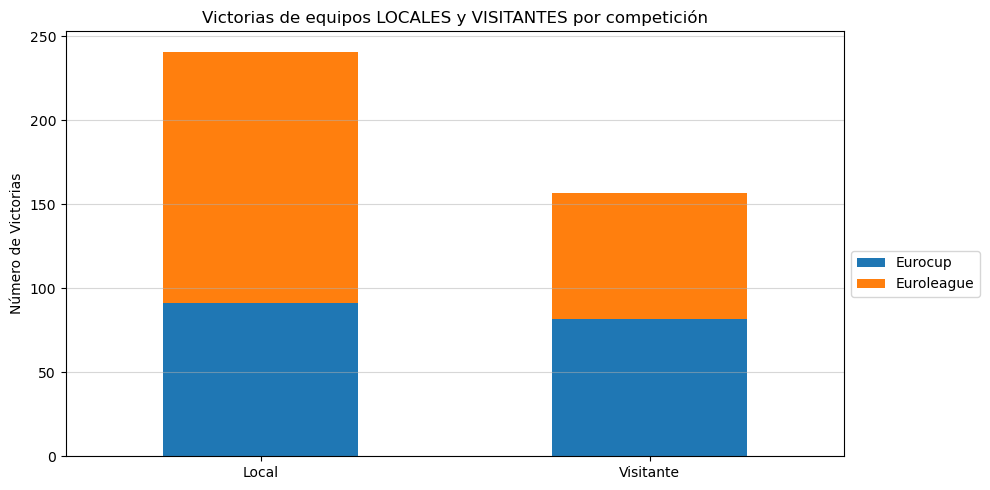

In [14]:
# Stacked columns
victorias_por_competencion = competition.groupby(["Ganador", "Competition"])["Competition"].count().unstack()
victorias_por_competencion.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Victorias de equipos LOCALES y VISITANTES por competición")
plt.xlabel("")
plt.ylabel("Número de Victorias")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1, 0.5), loc="upper left")
plt.grid(axis="y", linestyle="-", alpha=0.5)
plt.tight_layout();

**Your comments here**
- He utilizado un gráfico de columnas apiladas para comparar las victorias de los equipos locales y visitantes en cada competición.

- Este gráfico nos permite ver cómo se distribuyen estas victorias, ya sean de los equipos locales o visitantes de cada competición. Comparamos en que competición influye más jugar como local. De esta manera vemos el rendimiento en los distintos escenarios.

- Vemos que las victorias entre los equipos locales y visitantes en la Eurocup es bastante pareja. Por el contrario ser local en Euroliga es más determinante. El factor pista es fundamental en esta competición.

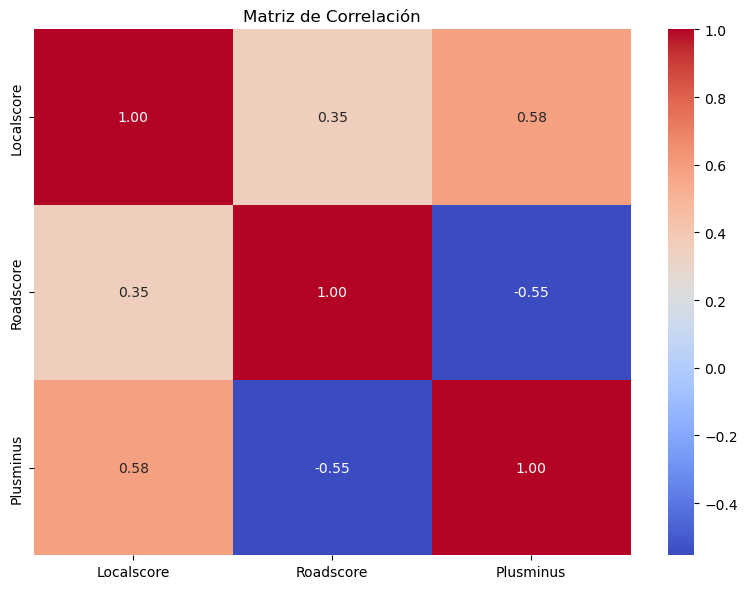

In [116]:
# Correlation / Heatmap
correlacion = competition[["Localscore", "Roadscore","Plusminus"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.tight_layout();

**Your comments here**
- Podemos usar un mapa de calor para visualizar la matriz de correlación entre variables.
- El mapa de calor nos permite identificar rápidamente correlaciones fuertes (tanto positivas como negativas) entre variables, lo que puede ayudar a entender mejor las relaciones en los datos.
- Vemos que Localscore tiene una correlación positva con Roadscore y Plusminus, estas variables incrementan conjuntamente, ya que tenemos más equipos locales que han ganado y eso hace que aumente el número de equipos perdidos y que el plusminus también crezca.
- También tiene coherencia que Roadscore, tenga una correlación negativa con Plusminus.

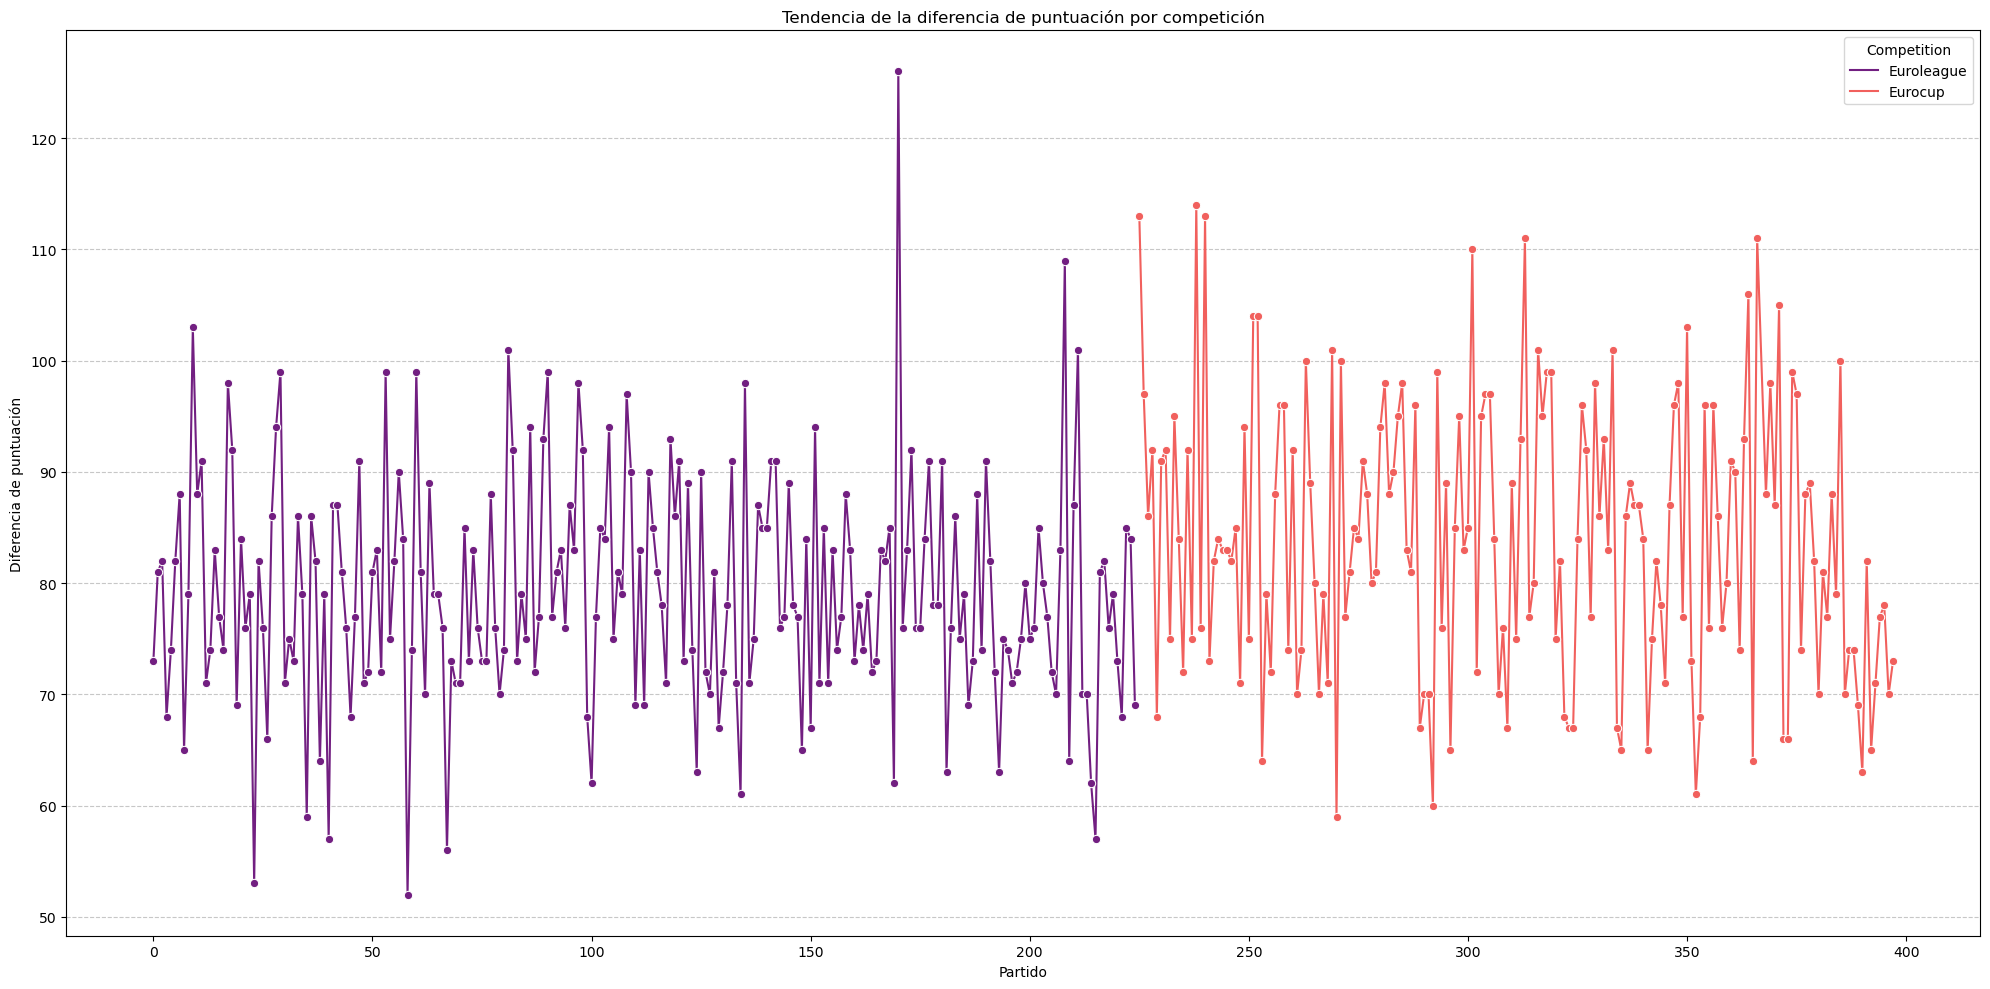

In [55]:
# Trends
plt.figure(figsize=(20, 10))
sns.lineplot(data=competition, x=competition.index, y="Roadscore", hue="Competition", marker="o", palette="magma")
plt.title("Tendencia de la diferencia de puntuación por competición")
plt.xlabel("Partido")
plt.ylabel("Diferencia de puntuación")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Your comments here**
- El gráfico de líneas que muestra cómo cambia la anotación de los equipos locales a lo largo de los partidos. Cada punto en el gráfico representa un partido, y la línea conecta estos puntos para mostrar la tendencia general de la diferencia de puntos.

- Lo que observamos es que los partidos de euroliga la anotación de los equipos locales generalemnte oscila entre los 70 y 90 puntos. En el grafico de la Eurocup entre lo 70 y 100. También vemos que en Eurocup tenemos más partidos que superan los 100.